Deming Regression은 Total Regression(전회귀)로도 불린다.

Deming Regression는 y값과 x값의 오차를 최소화한다.

Deming Regression을 구현하기 위해서는 Loss Cost Function을 수정해야 한다.

일반적인 선형 회귀의 비용함수는 수직거리를 최소화하기 때문이다.

직선의 기울기와 y절편을 이용하여 점까지 수식 거리를 구하고 tensorflow가 그 값을 최소화 하게 된다.

In [1]:
import tensorflow as tf
from tensorflow.python.framework import ops
import numpy as np
from sklearn.datasets import load_iris

ops.reset_default_graph()

iris = load_iris()
print(iris.keys())
# dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


print(iris.feature_names)
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# load the data
x_val = iris.data[:,3] # petal width
y_val = iris.data[:,0] # sepal length


# initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)


# create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_uniform(shape=[1, 1]))

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Instructions for updating:
Colocations handled automatically by placer.


In [2]:
with tf.Session() as sess:
    fomula = tf.add(tf.matmul(x_data, A) ,b)
    demm_numer = tf.abs(tf.subtract(fomula, y_target)) # numerator
    demm_denom = tf.sqrt(tf.add(tf.square(A), 1)) # denominator
    loss = tf.reduce_mean(tf.truediv(demm_numer, demm_denom)) # 점과 직선사이의 거리

    opt = tf.train.GradientDescentOptimizer(learning_rate=0.15)
    train_step = opt.minimize(loss)

    init = tf.global_variables_initializer()
    init.run()

    loss_vec = []
    batch_size = 125
   
    for i in range(1000):
        rand_idx = np.random.choice(len(x_val), size=batch_size)
        rand_x = x_val[rand_idx].reshape(-1, 1)
        rand_y = y_val[rand_idx].reshape(-1, 1)

        my_dict = {x_data:rand_x, y_target:rand_y}
        sess.run(train_step, feed_dict=my_dict)
        temp_loss = sess.run(loss, feed_dict=my_dict)
        loss_vec.append(temp_loss)

        if (i+1)%100==0:
            print('step {}: A={}, b={}, Loss={}'.format(i+1, A.eval(), b.eval(), temp_loss))
            # step 100: A=[[2.8481812]], b=[[2.1150784]], Loss=0.39886653423309326
            # step 200: A=[[2.4716957]], b=[[2.581221]], Loss=0.4149680733680725
            # step 300: A=[[2.0858126]], b=[[3.1767926]], Loss=0.37009572982788086
            # step 400: A=[[1.5102198]], b=[[3.989578]], Loss=0.30516621470451355
            # step 500: A=[[1.0213077]], b=[[4.55735]], Loss=0.25061553716659546
            # step 600: A=[[1.0353084]], b=[[4.609328]], Loss=0.2725234925746918
            # step 700: A=[[1.0107175]], b=[[4.6160936]], Loss=0.3082656264305115
            # step 800: A=[[1.0400845]], b=[[4.612001]], Loss=0.27881959080696106
            # step 900: A=[[1.0318567]], b=[[4.6159105]], Loss=0.27347463369369507
            # step 1000: A=[[0.9662517]], b=[[4.5973287]], Loss=0.2258552461862564

    [slope] = A.eval()
    [cept] = b.eval()

step 100: A=[[-4.429977]], b=[[5.0264673]], Loss=1.1883422136306763
step 200: A=[[-4.4157834]], b=[[7.103489]], Loss=1.0965512990951538
step 300: A=[[-4.1848326]], b=[[8.259549]], Loss=1.0110092163085938
step 400: A=[[-3.6274662]], b=[[9.432504]], Loss=0.798893392086029
step 500: A=[[-3.4251952]], b=[[10.046923]], Loss=0.8094901442527771
step 600: A=[[-3.5872827]], b=[[10.327909]], Loss=0.8358333706855774
step 700: A=[[-3.7845888]], b=[[10.553657]], Loss=0.7802285552024841
step 800: A=[[-3.9233623]], b=[[10.7941265]], Loss=0.7831000685691833
step 900: A=[[-4.1072526]], b=[[10.982842]], Loss=0.749678909778595
step 1000: A=[[-4.257821]], b=[[11.173542]], Loss=0.7746445536613464


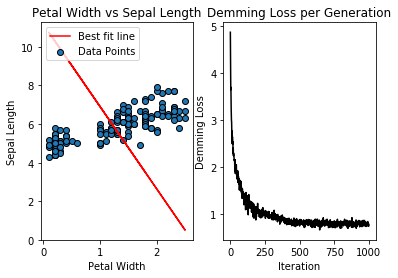

In [4]:
import matplotlib.pyplot as plt

best_fit = []
for i in x_val.ravel():
    poly = i*slope[0] + cept[0]
    best_fit.append(poly)

_, axes = plt.subplots(1, 2)
axes[0].scatter(x_val, y_val, edgecolors='k', label='Data Points')
axes[0].plot(x_val, best_fit, c='red', label='Best fit line')
axes[0].set_title('Petal Width vs Sepal Length', size=12)
axes[0].set_xlabel('Petal Width')
axes[0].set_ylabel('Sepal Length')
axes[0].legend(loc=2)

axes[1].plot(loss_vec, c='k')
axes[1].set_title('Demming Loss per Generation', size=12)
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Demming Loss')

plt.show()